In [47]:
from scipy.sparse import spdiags, kron, eye, linalg
import numpy as np

In [10]:
def A_matrix(n):
    ones = np.ones(n-1);
    L = spdiags([-ones, 2*ones, ones], [-1,0,1])
    I = eye(n-1)
    return kron(I,L) + kron(L,I)

In [100]:
def jacobi_iteration(A, u0, b, eps):
    Dinv = np.diag(1/A.diagonal())
    alpha = Dinv.dot(b - A.dot(u0))
    uk = u0 + alpha
    while np.sqrt(alpha.dot(alpha)) > eps:
        print(np.sqrt(alpha.dot(alpha)))
        alpha = Dinv.dot(b - A.dot(uk))
        uk = uk + alpha
    return uk

In [98]:
n = 128
A = A_matrix(n)
u0 = np.zeros((n-1)*(n-1))

x = y = np.linspace(0,1,n+1)[1:-1]
X, Y = np.meshgrid(x,y)

f = 5 * np.pi**2 * np.sin(2*np.pi*X)*np.sin(np.pi*Y)
b = f.flatten()

# u = linalg.spsolve(A, b)
u = jacobi_iteration(A, u0, b, 1e-10)
u.shape
# help(linalg.spsolve)

(16129,)

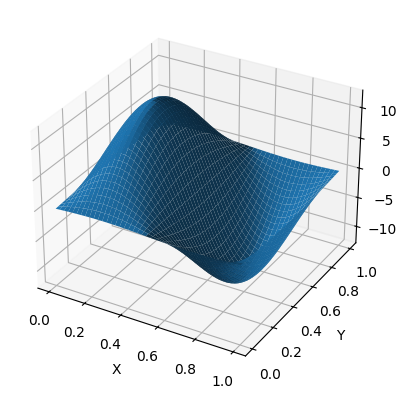

In [99]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.plot_surface(X,Y,u.reshape((n-1,n-1)))